In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import streamlit
import wordcloud
import string
import re
from bs4 import BeautifulSoup
import sklearn


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jspra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data = pd.read_csv('IMDB Dataset.csv')

In [12]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [14]:
data.dropna(inplace=True)

In [23]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought wonderful way spend time hot summer ...,positive
3,Basically there's family little boy (Jake) thi...,negative
4,"Petter Mattei's ""Love Time Money"" visually stu...",positive
...,...,...
49995,I thought movie right good job. It creative or...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I Catholic taught parochial elementary schools...,negative
49998,I'm going disagree previous comment side Malti...,negative


In [16]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [17]:
#removing stopwords
def remove_stopwords(text):
    str = " ".join(word for word in text.split() if word.lower() not in stopwords.words('english'))
    return str

In [20]:
data['review'] = data['review'].apply(remove_stopwords)

In [58]:
data['review']

0        one reviewers mentioned watching 1 oz episode ...
1        a wonderful little production     the filming ...
2        i thought wonderful way spend time hot summer ...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary schools...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art fans ...
Name: review, Length: 50000, dtype: object

In [59]:
#removing html elements from review
def remove_html(text):
    soup = BeautifulSoup(text,'html.parser')
    text = soup.get_text(separator=' ')
    text = re.sub(r'\bbr\b',' ',text)
    return text

In [60]:
data['review'] = data['review'].apply(remove_html)

In [61]:
data

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,a wonderful little production the filming ...,positive
2,i thought wonderful way spend time hot summer ...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,i thought movie right good job it creative ori...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i catholic taught parochial elementary schools...,negative
49998,im going disagree previous comment side maltin...,negative


In [62]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
#removing punctuation from review
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,"")
    text = text.lower()
    return text

In [64]:
data['review'] = data['review'].apply(remove_punctuation)

In [65]:
data

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,a wonderful little production the filming ...,positive
2,i thought wonderful way spend time hot summer ...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,i thought movie right good job it creative ori...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i catholic taught parochial elementary schools...,negative
49998,im going disagree previous comment side maltin...,negative


In [66]:
#wordcloud for negative sentiment reviews
from wordcloud import WordCloud

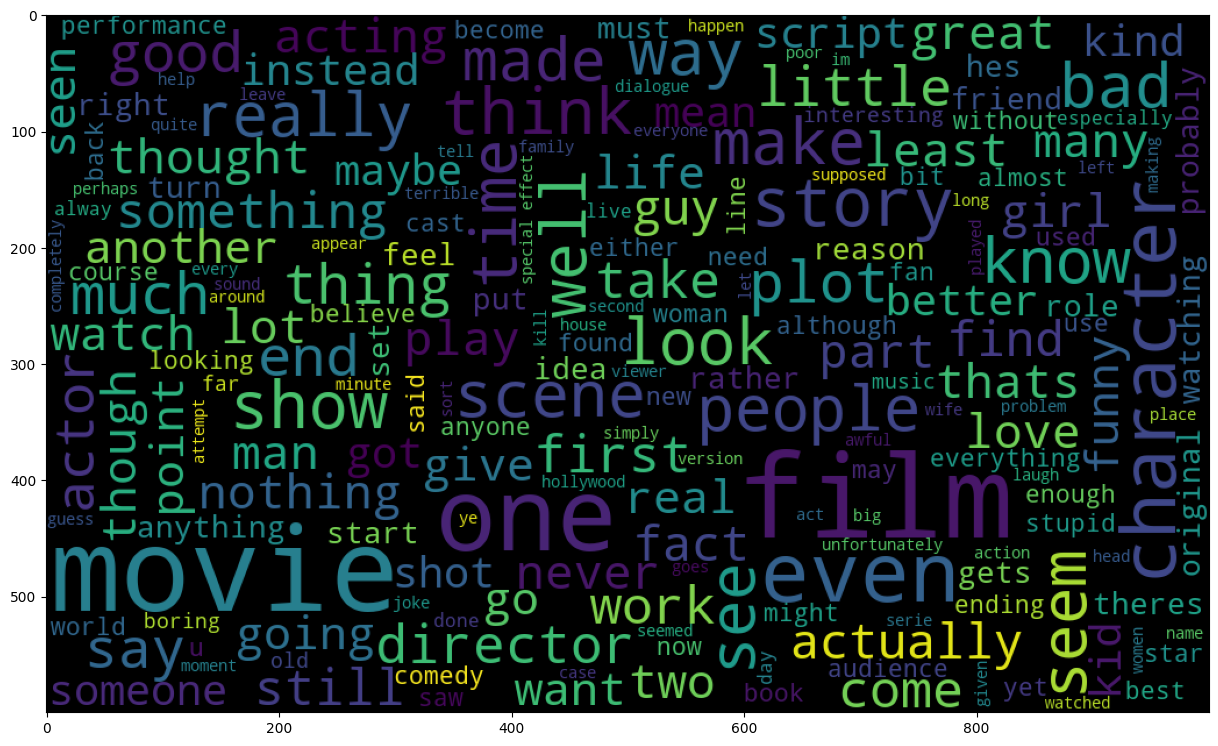

In [73]:
#draw the wordcloud for negative reviews
reviews = ' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud = WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews))
plt.show()

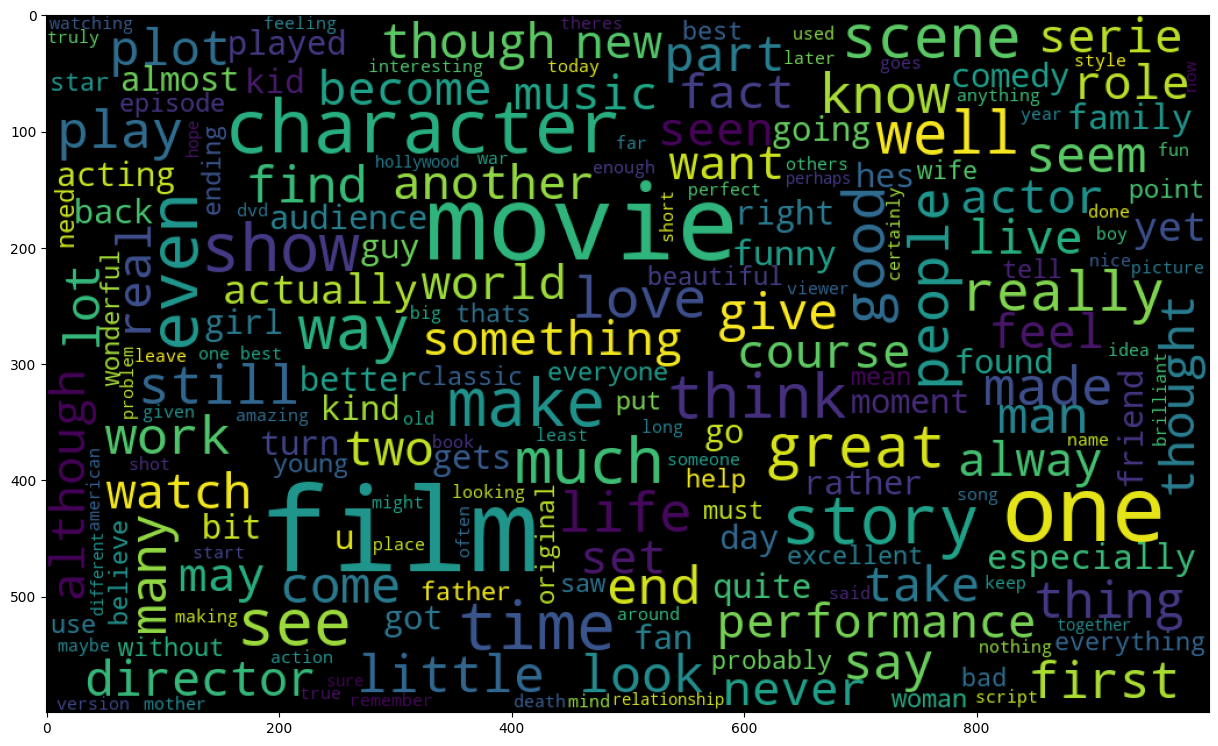

In [71]:
#draw the wordcloud for positive reviews
reviews = ' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud = WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews))
plt.show()

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
cv = TfidfVectorizer(max_features=2500)

In [188]:
reviews = cv.fit_transform(data['review']).toarray()

In [189]:
data['sentiment'] = data['sentiment'].replace(['positive','negative'],[1,0])

In [190]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [191]:
#data['sentiment'] = data['sentiment'].replace([0,1],['negative','positive'])

In [192]:
data

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,a wonderful little production the filming ...,1
2,i thought wonderful way spend time hot summer ...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49995,i thought movie right good job it creative ori...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i catholic taught parochial elementary schools...,0
49998,im going disagree previous comment side maltin...,0


In [193]:
from sklearn import feature_extraction

In [194]:
import numpy as np

In [195]:
vec = feature_extraction.text.TfidfVectorizer()

In [202]:
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression

In [203]:
model = LogisticRegression()

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(reviews,data['sentiment'],test_size=0.2)

In [177]:
reviews_train.shape

(40000, 2500)

In [178]:
reviews_test.shape

(10000, 2500)

In [179]:
sentiment_train.shape

(40000,)

In [180]:
sentiment_test.shape

(10000,)

In [206]:
model.fit(reviews_train,sentiment_train)

LogisticRegression()

In [207]:
predict = model.predict(reviews_test)

In [208]:
from sklearn.metrics import accuracy_score

In [209]:
accuracy = accuracy_score(sentiment_test,predict)

In [210]:
accuracy*100

88.38000000000001

In [211]:
#building confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

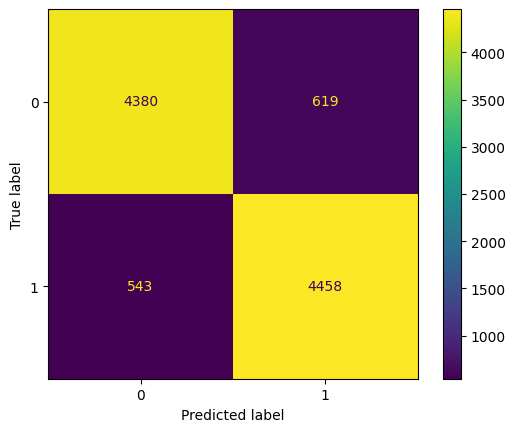

In [212]:
cm = confusion_matrix(sentiment_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [213]:
import pickle as pk

In [214]:
pk.dump(model,open('model.pkl','wb'))

In [215]:
pk.dump(cv,open('scalar.pkl','wb'))